In [24]:
!pip3 install matplotlib numpy

Defaulting to user installation because normal site-packages is not writeable


In [25]:
CO2_FIX = { # micromol CO2/mg Chl/h
    'high': 97,
    'low': 93,
    'very_low': 49
}

C_CHL = { # g Chl/L
    'nat': -1,
    'syn': 1.05
}

VOL = { # L
    'lab': 3,
    'dev': 50,
    'prod': 2000
}

Mm_CO2 = 44.009 # g/mol

def CO2_fix_kg_hr(fix: str = 'high', chl: str = 'syn', vol: str = 'prod'):
    CO2_Fix_g_h = (CO2_FIX[fix] / 10**6) * (C_CHL[chl] * 10**3) * VOL[vol] * Mm_CO2
    CO2_Fix_kg_h = CO2_Fix_g_h / 10**3
    return CO2_Fix_kg_h

def CO2_fix_kg_year(fix: str = 'high', chl: str = 'syn', vol: str = 'prod',  h_per_day: int = 24, days_in_year: int = 365):

    CO2_fix_kg_per_hr = CO2_fix_kg_hr(fix=fix,chl=chl,vol=vol)

    CO2_Fix_kg_year = CO2_fix_kg_per_hr * h_per_day * days_in_year
    return CO2_Fix_kg_year

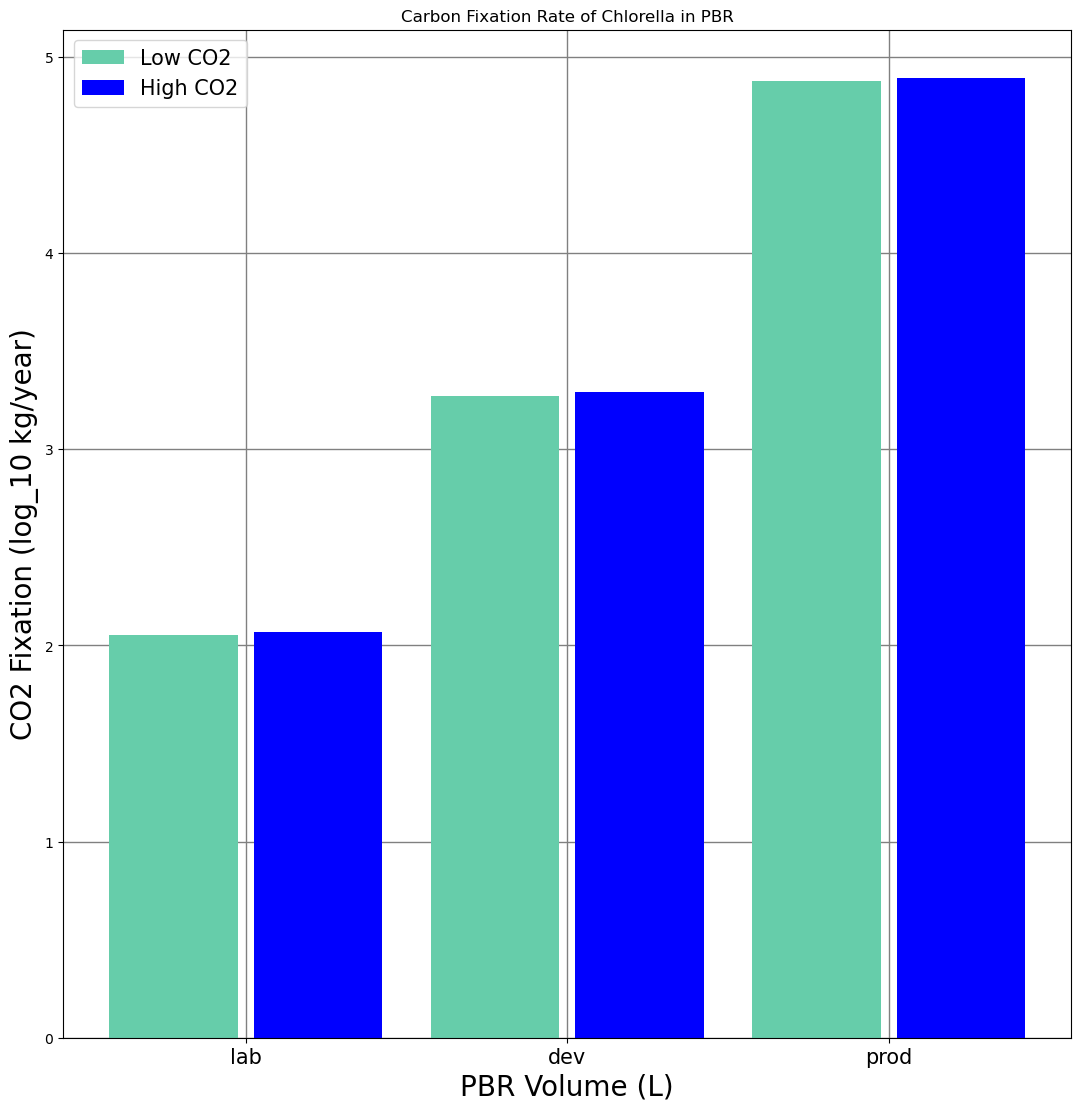

In [26]:
CO2_lab_hi, CO2_lab_lo = CO2_fix_kg_year(vol='lab'), CO2_fix_kg_year(fix='low',vol='lab')
CO2_dev_hi, CO2_dev_lo = CO2_fix_kg_year(vol='dev'), CO2_fix_kg_year(fix='low',vol='dev')
CO2_prod_hi, CO2_prod_lo = CO2_fix_kg_year(), CO2_fix_kg_year(fix='low')

import matplotlib.pyplot as plt, numpy as np, math

logarithm = lambda x: math.log10(x)

lows = [CO2_lab_lo, CO2_dev_lo, CO2_prod_lo]
highs = [CO2_lab_hi, CO2_dev_hi, CO2_prod_hi]
lows_norm, highs_norm = list(map(logarithm, lows)), list(map(logarithm, highs))
labels = list(VOL.keys())

fig, ax = plt.figure(figsize=(12,12)), plt.gca()
fig.subplots_adjust(left=0.08, bottom=0.08, right=0.92, top=0.92, wspace=0.2, hspace=0.5)
bar1 = np.arange(len(labels))
bar2 = [i+0.45 for i in bar1]

plt.bar(bar1, lows_norm, 0.4,color='mediumaquamarine',label='Low CO2')
plt.bar(bar2, highs_norm, 0.4,color='blue',label='High CO2')
plt.title('Carbon Fixation Rate of Chlorella in PBR')
plt.xlabel('PBR Volume (L)', fontsize=20)
plt.ylabel('CO2 Fixation (log_10 kg/year)', fontsize=20)
plt.xticks(np.add(bar1, bar2)/2,labels,fontsize=15)
plt.grid(color='grey',linewidth=1)
ax.set_axisbelow(True)
plt.legend(loc=2,prop={'size':15})
plt.show()

In [ ]:
print(labels)
print(lows)
print(highs)

['lab', 'dev', 'prod']
[112.93774417799999, 1882.2957363000003, 75291.82945199999]
[117.795281562, 1963.2546926999996, 78530.187708]
1.3088364618000001


In [30]:
print(CO2_fix_kg_year() * 80 / 1000)

6282.41501664
